# Predicting who survived the Titanic crash

> Using machine learning to predict who surved the titanic crash

Data from each passenger is used in the machine learning model to help build a prediction model as to who lived or died!

### Data

Data was acquired from Kaggle: https://www.kaggle.com/c/titanic/data

### Features

Dataset for the training model includes:
* survived:
    * 0: Dead
    * 1: Survived 
* pclass: A proxy for socio-economic status (SES)
    * 1st = Upper
    * 2nd = Middle
    * 3rd = Lower
* age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
* sibsp: Number of Siblings/Spouse aboard. The dataset defines family relations in this way...
    * Sibling = brother, sister, stepbrother, stepsister
    * Spouse = husband, wife (mistresses and fiancés were ignored)
* parch: Number of Children/Parent aboard. The dataset defines family relations in this way...
    * Parent = mother, father
    * Child = daughter, son, stepdaughter, stepson
    * **Some children travelled only with a nanny, therefore parch=0 for them.**
* ticket number
* fare: passenger far
* cabin: cabin number
* embarked: port of emarkation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set(style = 'whitegrid', font_scale= 1.5)

In [3]:
train = pd.read_csv('titanic/train.csv')
test_titanic = pd.read_csv('titanic/test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.shape, test_titanic.shape

((891, 12), (418, 11))

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train.isna().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
survive = train[train['Survived'] == 1]
dead = train[train['Survived'] == 0]

print(f'Survived: {len(survive)} ({len(survive)/len(train) * 100:.2f}%)')
print(f'Deceased: {len(dead)} ({len(dead)/len(train) * 100:.2f}%)')
print(f'Total Passengers: {len(train)}')

Survived: 342 (38.38%)
Deceased: 549 (61.62%)
Total Passengers: 891


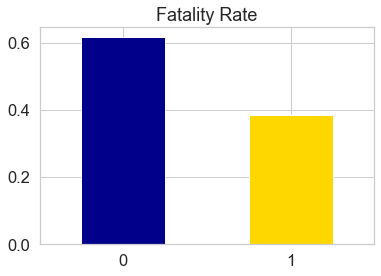

In [10]:
train['Survived'].value_counts(normalize=True).plot(kind = 'bar', color = ['darkblue', 'gold'], 
                                                    title = 'Fatality Rate')
plt.xticks(rotation = 0);

In [11]:
pd.crosstab(train['Sex'], train['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


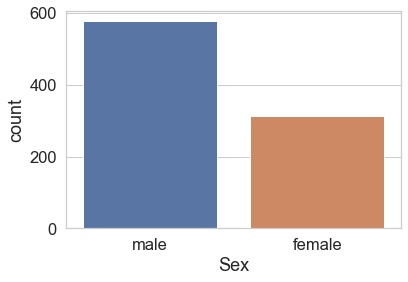

In [12]:
sns.countplot(x = 'Sex', data = train);

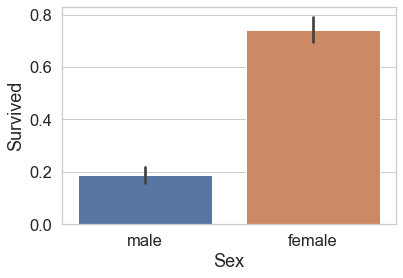

In [13]:
sns.barplot(x = 'Sex', y = 'Survived', data = train);

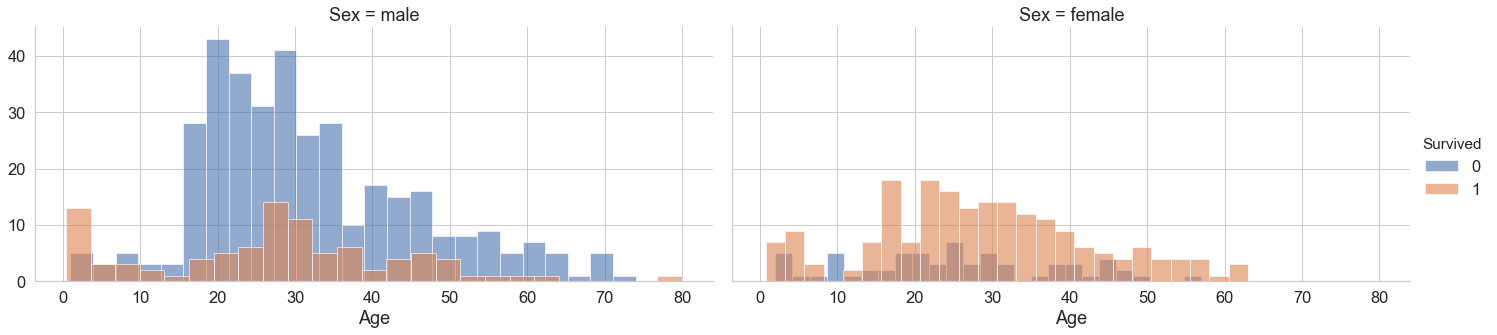

In [14]:
# Age Distribution of those who survived and those who died
g = sns.FacetGrid(train, col = 'Sex', hue = 'Survived',
                  height = 5, aspect = 2)
g.map(plt.hist, 'Age', bins = 25, alpha = 0.6)
g.add_legend();

In [15]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [16]:
pd.crosstab(train['Pclass'], train['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [17]:
train[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


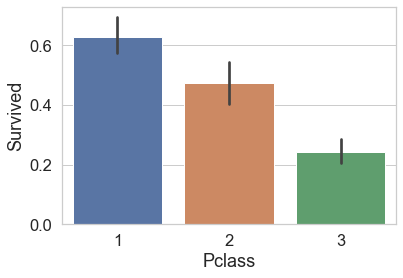

In [18]:
sns.barplot(x = 'Pclass', y = 'Survived', data = train);

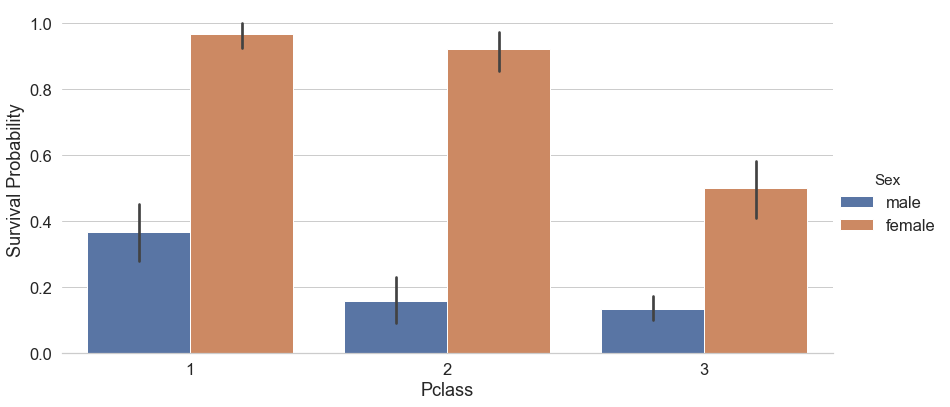

In [19]:
g = sns.catplot(x = "Pclass", y = "Survived", hue = "Sex",
                   data = train, kind = "bar",
                   height = 6, aspect = 2, palette = "deep",
                   legend = True)
g.despine(left=True)
#plt.legend(loc='upper right')
g.set_ylabels("Survival Probability");

**Females have the higher probability of surviving**

The same can be said for 1st class passengers. 1st and 2nd class female passengers are almost gauranteed to survive.

Let's see what other correlation we can find between the feature data and the target label

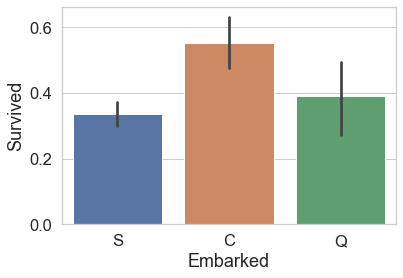

In [20]:
sns.barplot(x = 'Embarked', y = 'Survived', data = train);

In [21]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [22]:
pd.crosstab(train['Parch'], train['Survived'])

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


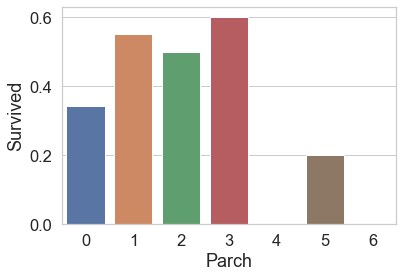

In [23]:
sns.barplot(x = 'Parch', y = 'Survived', data = train, ci = None);

In [24]:
pd.crosstab(train['SibSp'], train['Survived'])

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


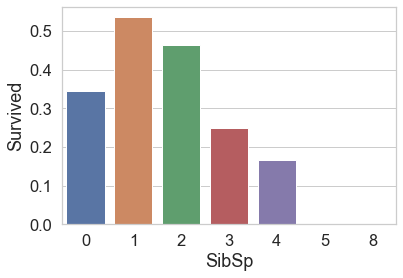

In [25]:
sns.barplot(x = 'SibSp', y = 'Survived', data = train, ci = None);

There exists some similarity in the survival rates of `SibSp` and `Parch`

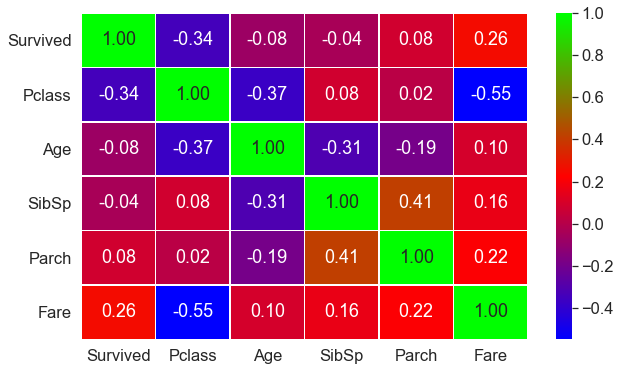

In [26]:
# Finding a correlation
corr_matrix = train.drop('PassengerId', axis = 1).corr()
fig, ax = plt.subplots(figsize = (10,6))
ax = sns.heatmap(corr_matrix, 
                 annot = True,
                 lw = 0.5,
                 fmt = '.2f',
                 cmap = 'brg')

In [27]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
test_titanic.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [29]:
train['ageRange'] = pd.cut(train['Age'], 5)
train[['ageRange', 'Survived']].groupby(['ageRange'], as_index = False).mean()

,ageRange,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.369942
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


Certain age brackets had a higher likelihood of surviving

In [30]:
train['CabinLetter'] = train['Cabin'].str[0]
train[['CabinLetter', 'Survived']].groupby(['CabinLetter']).mean().sort_values(by = 'Survived', ascending = False)

,Survived
CabinLetter,
D,0.757576
E,0.750000
B,0.744681
F,0.615385
C,0.593220
G,0.500000
A,0.466667
T,0.000000


In [31]:
train['familySize'] = np.where((train['SibSp'] + train['Parch'] != 0), train['SibSp'] + train['Parch'], 0)
train[['familySize', 'Survived']].groupby(['familySize'], as_index = False).mean()

,familySize,Survived
0,0,0.303538
1,1,0.552795
2,2,0.578431
3,3,0.724138
4,4,0.200000
5,5,0.136364
6,6,0.333333
7,7,0.000000
8,10,0.000000


Passengers who came with family have a greater chance of surviving, ***unless*** their family is too big

In [32]:
train = pd.read_csv('titanic/train.csv')
test_titanic = pd.read_csv('titanic/test.csv')

In [33]:
# Function that will change both the training set and test set
def change_test(model):
    # Creating a column that combines SibSp and Parch column into one column
    model['familySize'] = np.where((model['SibSp'] + model['Parch'] != 0), model['SibSp'] + model['Parch'], 0)
        
    # Fills in NaN data in the model with pandas method
    model['Age'].fillna(model['Age'].median(), inplace = True)
    model['Embarked'].fillna('S', inplace = True)
    model['Fare'].fillna(model['Fare'].median(), inplace = True)
        
    # Turns categorical dtypes into numerical
    model['Sex'] = np.where(model['Sex'] == 'male', 0, 1)
    model['Embarked'] = np.where(model['Embarked'] == 'C', 3,
                                     np.where(model['Embarked'] == 'Q', 2, 1))
        
    # Getting the first letter of cabin category and making it into a numerical column
    model['CabinLetter'] = model['Cabin'].str[0]
    cabin_map = {'A': 1, 'G': 2, 'C': 3, 'F': 4, 'B': 5, 'E': 6, 'D': 7, 'T': 0}
    model['CabinLetter'] = model['CabinLetter'].map(cabin_map)
    model['CabinLetter'].fillna(8, inplace = True)
    
    # Extract abbreviations from name and change it to numerical
    model['Title'] = model['Name'].str.extract('([a-zA-Z]+)\.')
    model['Title'] = model['Title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady', 
                                                 'Major', 'Mlle', 'Mme', 'Ms', 'Rev', 'Sir'], 'Other')
    map_title = {'Mr': 1, 'Master': 2, 'Miss': 3, 'Mrs': 4, 'Other': 5}
    model['Title'] = model['Title'].map(map_title)
    model['Title'].fillna(0, inplace = True)
    
    # Age determination
    # Putting age into a numerical category called ageRange
    model.loc[model['Age'] <= 16, 'ageRange'] = 1
    model.loc[(model['Age'] > 16) & (model['Age'] <= 32), 'ageRange'] = 2
    model.loc[(model['Age'] > 32) & (model['Age'] <= 48), 'ageRange'] = 3
    model.loc[(model['Age'] > 48) & (model['Age'] <= 64), 'ageRange'] = 4
    model.loc[model['Age'] > 64, 'ageRange'] = 5
    model.loc[model['Age'].isna(), 'ageRange'] = 6
        
        
    # Returns the new dataframe
    return model

In [34]:
new_train = change_test(train)
new_test = change_test(test_titanic)

In [35]:
new_train.drop(['Name','Ticket','Cabin'], axis = 1, inplace = True)
new_test.drop(['Name','Ticket','Cabin'], axis = 1, inplace = True)

In [36]:
new_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,familySize,CabinLetter,Title,ageRange
0,1,0,3,0,22.0,1,0,7.2500,1,1,8.0,1,2.0
1,2,1,1,1,38.0,1,0,71.2833,3,1,3.0,4,3.0
2,3,1,3,1,26.0,0,0,7.9250,1,0,8.0,3,2.0
3,4,1,1,1,35.0,1,0,53.1000,1,1,3.0,4,3.0
4,5,0,3,0,35.0,0,0,8.0500,1,0,8.0,1,3.0


In [37]:
new_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,familySize,CabinLetter,Title,ageRange
0,892,3,0,34.5,0,0,7.8292,2,0,8.0,1.0,3.0
1,893,3,1,47.0,1,0,7.0000,1,1,8.0,4.0,3.0
2,894,2,0,62.0,0,0,9.6875,2,0,8.0,1.0,4.0
3,895,3,0,27.0,0,0,8.6625,1,0,8.0,1.0,2.0
4,896,3,1,22.0,1,1,12.2875,1,2,8.0,4.0,2.0


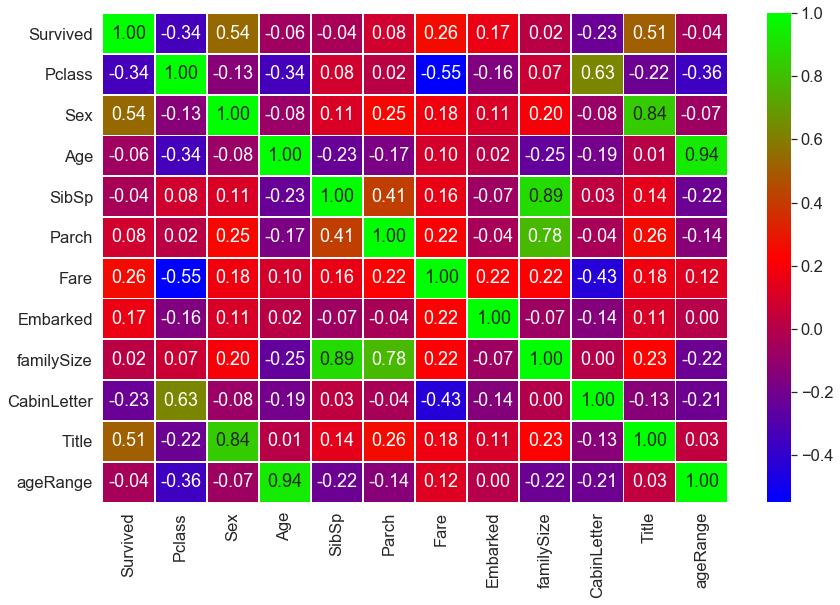

In [38]:
new_matrix = new_train.drop('PassengerId', axis = 1).corr()
fig, ax = plt.subplots(figsize = (14,9))
ax = sns.heatmap(new_matrix, 
                 annot = True,
                 lw = 0.7,
                 fmt = '.2f',
                 cmap = 'brg')

In [39]:
from sklearn.model_selection import train_test_split

# Splitting up the training data
X = new_train.drop(['PassengerId', 'Survived'], axis = 1)
y = new_train['Survived']
new_test = new_test.drop('PassengerId', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

In [40]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 11), (179, 11), (712,), (179,))

In [41]:
new_test.shape

(418, 11)

In [42]:
# Models to try
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score

In [43]:
# Creating a dictionary of model instances for classification
classification_models = {
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'LogisticRegression': LogisticRegression(max_iter = 1000),
    'LinearSVC': LinearSVC(max_iter=10000)
}

# An empyy dictionary of the regression results
classification_results = {}

In [44]:
np.random.seed(21)
for model_name, model in classification_models.items():
    
    # Putting the score of the model into the empty classification dictionary
    classification_results[model_name] = np.mean(cross_val_score(model, X, y))

/Users/kyleortega/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/kyleortega/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/kyleortega/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/kyleortega/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/kyleortega/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblin

In [45]:
classification_results

{'KNeighborsClassifier': 0.7317870817902203,
 'GradientBoostingClassifier': 0.8327663046889711,
 'RandomForestClassifier': 0.8148138848785387,
 'DecisionTreeClassifier': 0.7822923859142552,
 'LogisticRegression': 0.7946268281965978,
 'LinearSVC': 0.7968551879982424}

## Model Evaluation

In [46]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc.score(X_test, y_test)

0.7932960893854749

In [47]:
np.mean(cross_val_score(gbc, X, y))

0.8327663046889711

In [48]:
gbc.fit(X, y)
y_preds = gbc.predict(new_test)
y_preds

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

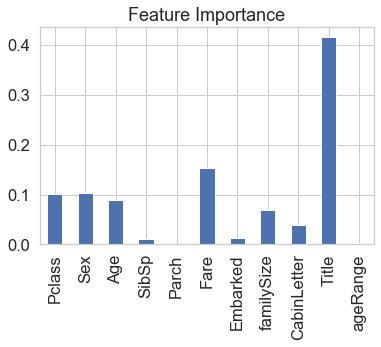

In [49]:
# Visualize the importance feaetures
feature_dict = dict(zip(X.columns, gbc.feature_importances_))
importance_df = pd.DataFrame(feature_dict, index = [0])
importance_df.T.plot.bar(title = 'Feature Importance', legend = False);

### Remove Features that have little to no importance and/or just experiment to see accuracy results 

In [50]:
classification_results

{'KNeighborsClassifier': 0.7317870817902203,
 'GradientBoostingClassifier': 0.8327663046889711,
 'RandomForestClassifier': 0.8148138848785387,
 'DecisionTreeClassifier': 0.7822923859142552,
 'LogisticRegression': 0.7946268281965978,
 'LinearSVC': 0.7968551879982424}

In [51]:
#param = ['SibSp', 'Parch', 'ageRange', 'Embarked']
param = ['SibSp', 'Parch', 'Age', 'Embarked']
newX = X.drop(param, axis = 1)
newer_test = new_test.drop(param, axis = 1)
X_train, X_test, y_train, y_test = train_test_split(newX, y, test_size = 0.2, random_state = 42)

In [52]:
classification_models = {
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'LogisticRegression': LogisticRegression(max_iter = 1000)
}
# An empyy dictionary of the regression results
classification_results = {}

In [53]:
np.random.seed(42)
for model_name, model in classification_models.items():
      
    # Putting the score of the model into the empty classification dictionary
    classification_results[model_name] = np.mean(cross_val_score(model, newX, y))

In [54]:
classification_results

{'KNeighborsClassifier': 0.790157554453581,
 'GradientBoostingClassifier': 0.8271734354403366,
 'RandomForestClassifier': 0.8114619295712762,
 'DecisionTreeClassifier': 0.7923733601154981,
 'LogisticRegression': 0.7867867679367272}

In [55]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc.score(X_test, y_test)

0.8100558659217877

In [56]:
np.mean(cross_val_score(gbc, newX, y))

0.8271734354403366

In [57]:
gbc.fit(newX,y)
y_preds = gbc.predict(newer_test)
y_preds

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

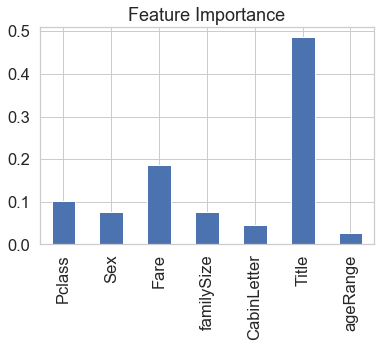

In [58]:
feature_dict = dict(zip(newX.columns, (gbc.feature_importances_)))
importance_df = pd.DataFrame(feature_dict, index = [0])
importance_df.T.plot.bar(title = 'Feature Importance', legend = False);

### Time for some HyperParameter Tuning

In [59]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [60]:
gb_rs = {'max_depth': [5,6,7,8],
        'min_samples_split': np.arange(110, 121),
        'min_samples_leaf': np.arange(5, 16),
        'n_estimators': [69,100,150]
        }

gb_grid = {'max_depth': [4,5,6],
        'min_samples_split': [110, 112, 120],
        'min_samples_leaf': [5,6,7],
        }

def random_search(random_dict, model):
    searchCV = RandomizedSearchCV(estimator = model,
                                 param_distributions = random_dict,
                                 n_iter = 15,
                                 cv = 5,
                                 scoring = 'accuracy')
    return searchCV

def grid_search(random_dict, model):
    searchCV = GridSearchCV(estimator = model,
                           param_grid = random_dict,
                           cv = 8,
                           verbose = 0)
    return searchCV

In [61]:
gb_random_tune = random_search(gb_rs, GradientBoostingClassifier())
gb_random_tune.fit(X_train, y_train)
gb_random_tune.score(X_test, y_test)

0.8268156424581006

In [62]:
gb_grid_tune = grid_search(gb_grid, GradientBoostingClassifier())
gb_grid_tune.fit(X_train, y_train)
gb_grid_tune.score(X_test, y_test)

0.8324022346368715

In [63]:
gb_random_tune.best_params_

{'n_estimators': 69,
 'min_samples_split': 118,
 'min_samples_leaf': 6,
 'max_depth': 6}

In [64]:
gb_grid_tune.best_params_

{'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 112}

In [65]:
# Utilizing a combination of GridSearch and slight manual hyperparameter tuning
#gbc = GradientBoostingClassifier(max_depth = 6, min_samples_leaf = 6, min_samples_split = 118, n_estimators = 69)
gbc = GradientBoostingClassifier(min_samples_split = 112, min_samples_leaf = 6, max_depth = 5)
np.mean(cross_val_score(gbc, newX, y))

0.8417425145941874

In [66]:
gbc.fit(newX, y)
y_preds = gbc.predict(newer_test)
y_preds

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [67]:
submit = pd.DataFrame({
    'PassengerId': test_titanic['PassengerId'],
    'Survived': y_preds
})

submit.to_csv('Titanic-challenge.csv', index = False)

## FIN...for NOW